In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

# DATA PREPARATION
* Data Importation
* 2013 Data Extraction
* Data Manipulation 
    * Fixing Data Types
    * Dropping Unnecessary Columns
    * Adding New Columns Relevant to Analysis
    


In [2]:
def wrangle(filepath):
    #import csv file
    df = pd.read_csv(filepath)
    
     
    #defining new aggregate for further statistical calculations
    df["N_Aggregate"]= df.iloc[:, 2:11].sum(axis = 1)
    
    #converting data to datetime
    df["Time"]= pd.to_datetime(df["Time"], format = "%d/%m/%Y %H:%M")

    
    #Adding month, Day, Hour and Minutes to our df
   
    df["Day"] = df["Time"].dt.day
    df["Hour"] = df["Time"].dt.hour
    df["Minutes"] = df["Time"].dt.minute
    df["Weekofyear"] = df["Time"].dt.weekofyear
    df["Dayofyear"] = df["Time"].dt.dayofyear
    df["Quarter"] = df["Time"].dt.quarter
    df["month"] = df["Time"].dt.month
    df["Dayofweek"] = df["Time"].dt.dayofweek
    df["Month_name"] = df["Time"].dt.month_name()
    df["Dayofweek"] = df["Time"].dt.day_name()
    
     # splitting Time Column for effective navigation
    df['date'] = [d.date() for d in df['Time']]
    df['time'] = [d.time() for d in df['Time']]
    
    #converting "date" dtype
    df["date"]= pd.to_datetime(df["date"], format = "%Y-%m-%d")
    
    # Convertine "time" dtype
    df["time"]= pd.to_datetime(df["time"], format = "%H:%M:%S")
    
    # converting "dtype"
    df["time"]= pd.to_datetime(df["time"], format = "%H:%M:%S")
    
    
    
    # extracting 2013 data
    df = df[df["Time"] <"2014"]
    
    # Removing the date value in 'time column'
    df['time'] = pd.Series([val.time() for val in df['time']])
    
    #Dropping the column "Aggregate"
    df=df.drop(columns="Aggregate")
    
    # Reset Index
    df = df.reset_index(drop = True)
    
    
    return df
    
"""Using this function, we have successfully removed columns that may not be relevant to our analysis (eg. "Aggregate"), 
added new columns for (Date, Time, Day of Week, Day, Hour and Minute), fixed dtype issues, extracted 2013 data and are set to start digging in"""

'Using this function, we have successfully removed columns that may not be relevant to our analysis (eg. "Aggregate"), \nadded new columns for (Date, Time, Day of Week, Day, Hour and Minute), fixed dtype issues, extracted 2013 data and are set to start digging in'

First, we'll import the general Dataset and perform our EDA for all appliaces before narrowing down to the appliance we wish to predict usage for

In [3]:
# importing data
df1 = wrangle("appliancesload.csv")
df1.head()

#Here, we see that all our data for 2013 has been imported with new features for Date and Time and a New Aggregate

C:\Users\El-Onah\AppData\Local\Temp\ipykernel_15880\645334158.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Weekofyear"] = df["Time"].dt.weekofyear


,Time,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,...,Hour,Minutes,Weekofyear,Dayofyear,Quarter,month,Dayofweek,Month_name,date,time
0,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0,...,22,8,38,260,3,9,Tuesday,September,2013-09-17,22:08:00
1,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0,...,22,8,38,260,3,9,Tuesday,September,2013-09-17,22:08:00
2,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0,...,22,8,38,260,3,9,Tuesday,September,2013-09-17,22:08:00
3,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0,...,22,8,38,260,3,9,Tuesday,September,2013-09-17,22:08:00
4,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0,...,22,8,38,260,3,9,Tuesday,September,2013-09-17,22:08:00


In [4]:
# check df info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487251 entries, 0 to 487250
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Time             487251 non-null  datetime64[ns]
 1   Fridge-Freezer   487251 non-null  int64         
 2   Washing Machine  487251 non-null  int64         
 3   Dishwasher       487251 non-null  int64         
 4   Television Site  487251 non-null  int64         
 5   Microwave        487251 non-null  int64         
 6   Toaster          487251 non-null  int64         
 7   Hi-Fi            487251 non-null  int64         
 8   Kettle           487251 non-null  int64         
 9   Overhead Fan     487251 non-null  int64         
 10  N_Aggregate      487251 non-null  int64         
 11  Day              487251 non-null  int64         
 12  Hour             487251 non-null  int64         
 13  Minutes          487251 non-null  int64         
 14  Weekofyear       487

In [5]:
# Check data shape
df1.shape

(487251, 22)

In [6]:
# Checking the statistical qualities of our df
df1.describe()

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,N_Aggregate,Day,Hour,Minutes,Weekofyear,Dayofyear,Quarter,month
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638,139.241966,16.814755,11.367552,29.549842,40.393692,278.742843,3.625511,9.630847
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527,454.010757,8.241081,6.959798,17.326864,1.694801,11.622131,0.483991,0.498886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,38.000000,260.000000,3.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,15.000000,39.000000,269.000000,3.000000,9.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,19.000000,11.000000,30.000000,40.000000,278.000000,4.000000,10.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,23.000000,17.000000,45.000000,42.000000,288.000000,4.000000,10.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000,7112.000000,30.000000,23.000000,59.000000,52.000000,360.000000,4.000000,12.000000


In [7]:
# checking for null values
df1.isnull().sum()

Time               0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
N_Aggregate        0
Day                0
Hour               0
Minutes            0
Weekofyear         0
Dayofyear          0
Quarter            0
month              0
Dayofweek          0
Month_name         0
date               0
time               0
dtype: int64

# EXPLORATORY DATA ANALYSIS
Conduct data study and exploratory analysis as follows: 
    • Clean data (if necessary)
    • Process date feature into day and month
    • Process time feature into hour and minute
    • Extract consumption of individual appliances in graphs on monthly basis
    • Explore time-of-use of appliances at different hours of the day
    • Do comparison of various appliances consumptions
    

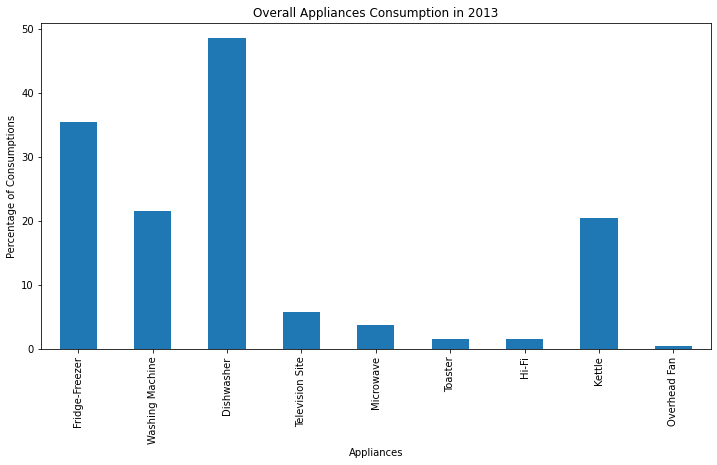

In [8]:
#Plotting the General Usage for the appliances in our Dataset
variables = df1.iloc[:, 1:10]

variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Overall Appliances Consumption in 2013');

From the above chart, we can see that the most used Appliances are Dishwashers. Followed by Fridge Freezer, Washing Maching, Kettle and others. 

# MONTHLY ELECTRICITY CONSUMPTION CHART

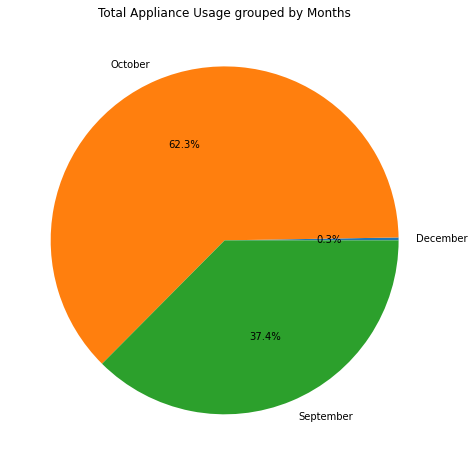

In [9]:

(
    df1.groupby("Month_name").size()
    .plot(kind = 'pie', 
    subplots=True, 
    figsize=(8,8), 
    autopct='%1.1f%%')
)
plt.title("Total Appliance Usage grouped by Months")
plt.ylabel("")
plt.show;

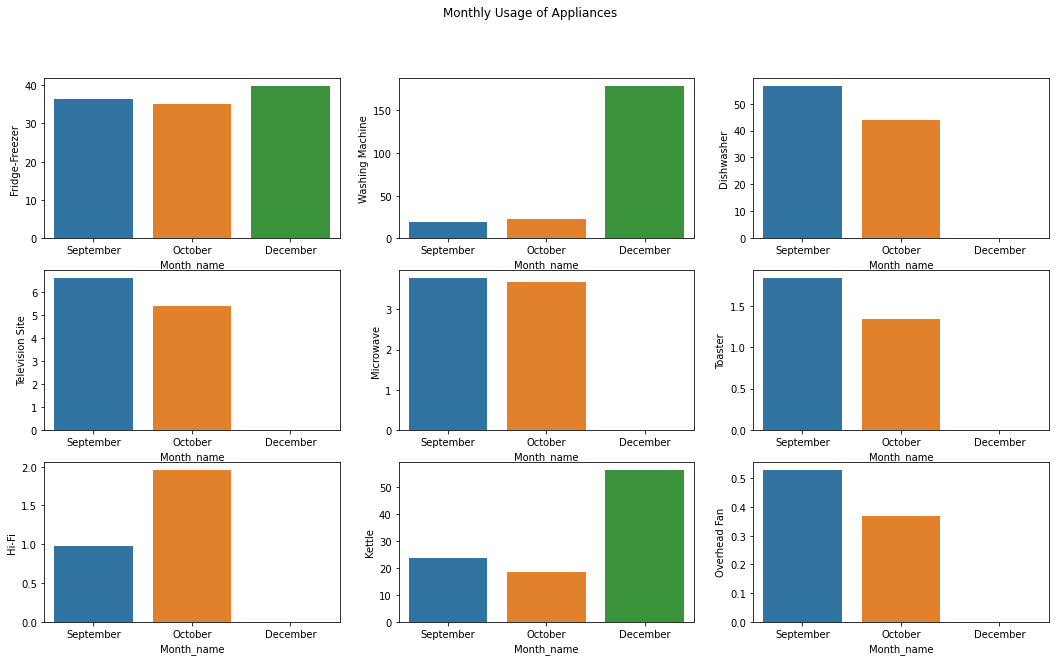

In [10]:
# MONTHLY CONSUMPTION PER APPLIANCE
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Monthly Usage of Appliances')

# Plotting the monthly consumption of "fridge freezer"
sns.barplot(ax=axes[0, 0],x="Month_name",y="Fridge-Freezer",data=df1,ci=None );

# Plotting the monthly consumption of "Washing Machine"
sns.barplot(ax=axes[0, 1],x="Month_name",y="Washing Machine",data=df1,ci=None );

# Plotting the monthly consumption of "Dishwasher"
sns.barplot(ax=axes[0, 2],x="Month_name",y="Dishwasher",data=df1,ci=None );

# # Plotting the monthly consumption of "Television Site"
sns.barplot(ax=axes[1, 0],x="Month_name",y="Television Site",data=df1,ci=None);

# Plotting the monthly consumption of "Microwave"
sns.barplot(ax=axes[1, 1],x="Month_name",y="Microwave",data=df1,ci=None );

# Plotting the monthly consumption of "Toaster"
sns.barplot(ax=axes[1, 2],x="Month_name",y="Toaster",data=df1,ci=None );

# Plotting the monthly consumption of "Hi-Fi"
sns.barplot(ax=axes[2, 0], x="Month_name",y="Hi-Fi",data=df1,ci=None );

# Plotting the monthly consumption of "Kettle"
sns.barplot(ax=axes[2, 1],x="Month_name",y="Kettle",data=df1,ci=None );

# Plotting the monthly consumption of "Overhead Fan"
sns.barplot(ax=axes[2, 2],x="Month_name",y= "Overhead Fan",data = df1,ci=None);


The above group of charts displays the monthly consumptions of each of the appliances; with the 'x-axis' containing each month and the 'y-axis' containing the device consumption. 

This charts further confirms our findings from the above charts that appliances were most used in October and least-used in December. 

# DAILY CONSUMPTION OF EACH APPLIANCES PER MONTH


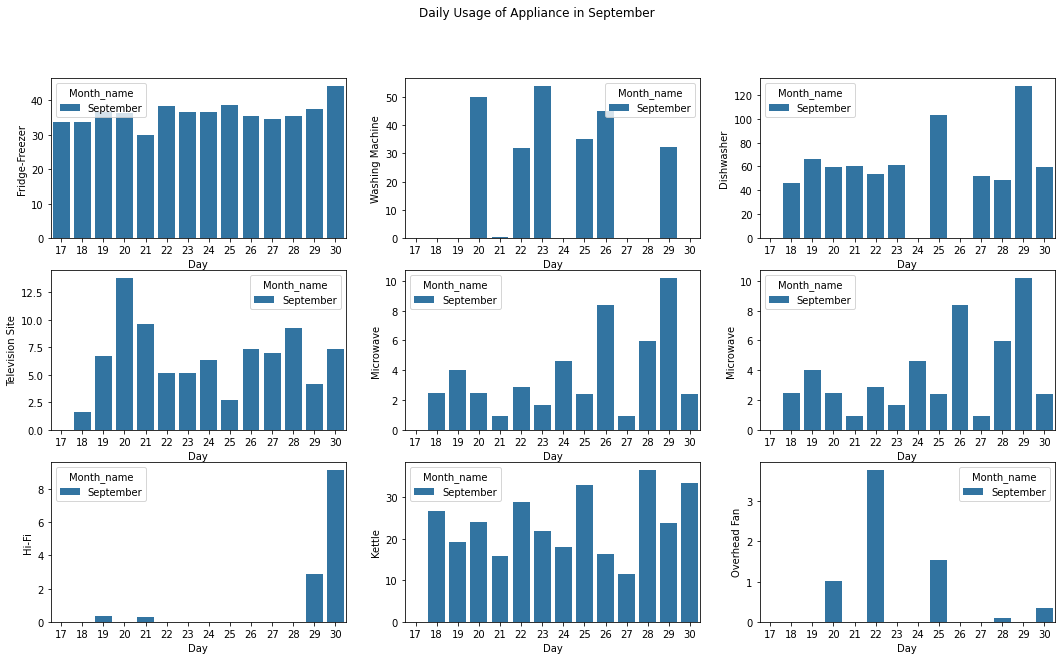

In [11]:
# DAILY CONSUMPTION OF EACH APPLIANCES IN SEPTEMBER

sept = df1[df1["Month_name"] == "September"]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Daily Usage of Appliance in September')

# Plotting the monthly consumption of "fridge freezer"
# Daily Usage of "Fridge Freezer in September"
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Washing Machine" in September
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Dishwasher" in September
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Television Site" in September
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Microwave" in September
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Toaster" in September
sns.barplot(ax=axes[1, 2], x="Day",y="Microwave",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Hi-Fi" in September
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Kettle" in September
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=sept,ci=None);

# Daily Usage of "Overhead Fan" in September
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=sept,ci=None);

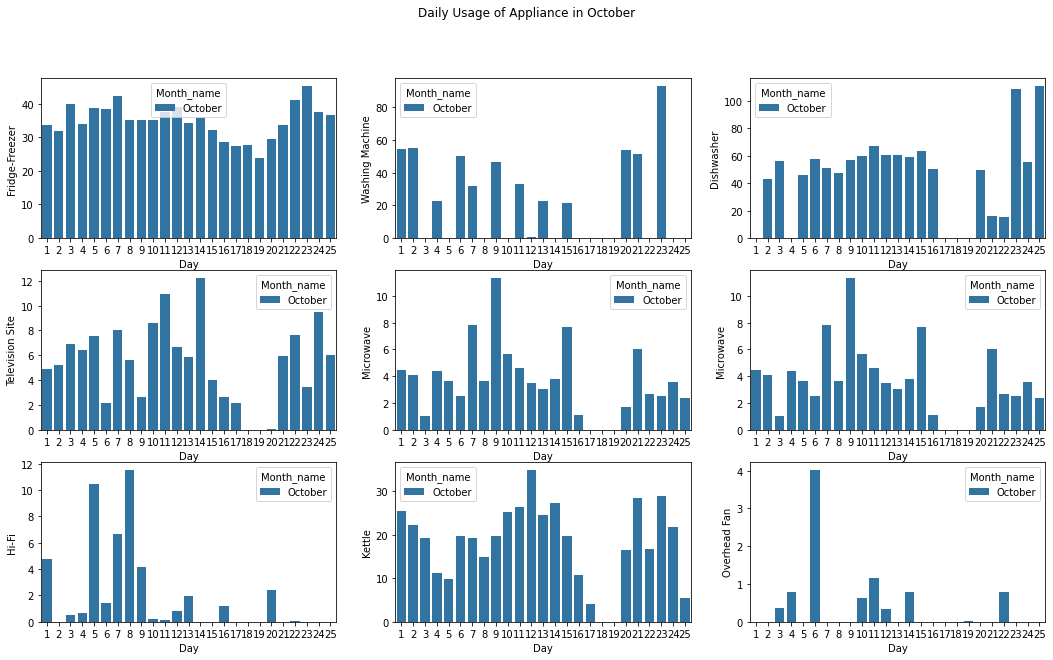

In [12]:
# OCTOBER DAILY CONSUMPTION CHARTS
oct = df1[df1["Month_name"] == "October"]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Daily Usage of Appliance in October')

# Daily Usage of "Fridge Freezer in October
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Washing Machine" in October
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Dishwasher" in October
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Television Site" in October
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Microwave" in October
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Toaster" in October
sns.barplot(ax=axes[1, 2], x="Day",y="Microwave",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Hi-Fi" in October
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Kettle" in October
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=oct, ci=None);

# Daily Usage of "Overhead Fan" in October
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=oct,ci=None);

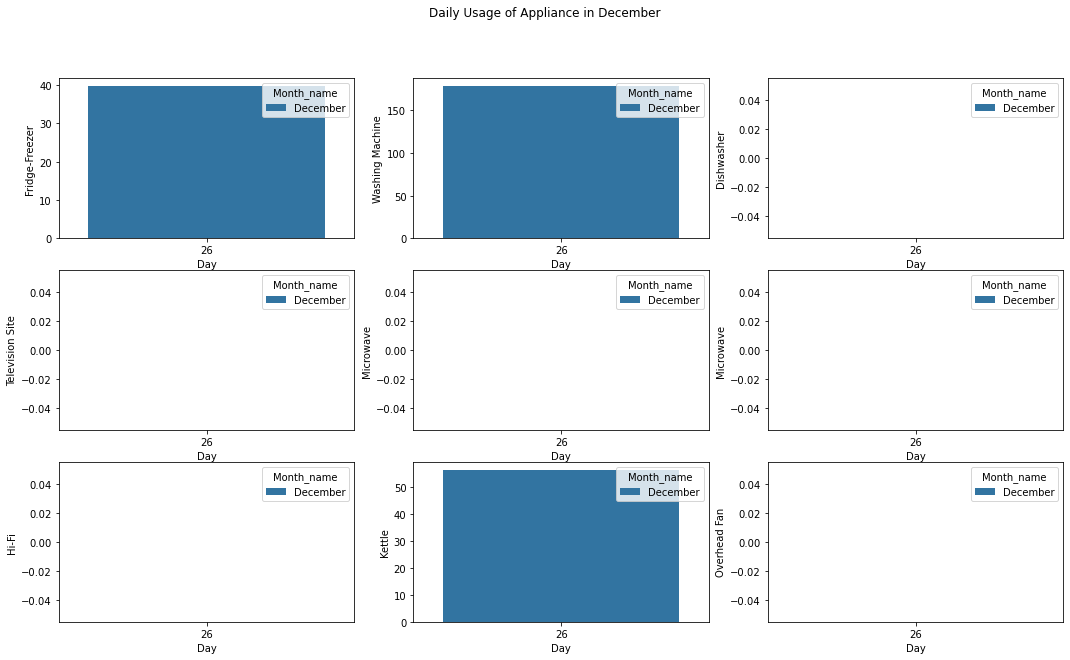

In [13]:
# DECEMBER DAILY CONSUMPTION CHART
dec = df1[df1["Month_name"] == "December"]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Daily Usage of Appliance in December')


# Daily Usage of "Fridge Freezer in December
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Washing Machine" in December
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Dishwasher" in December
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Television Site" in December
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Microwave" in December
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Toaster" in December
sns.barplot(ax=axes[1, 2], x="Day",y="Microwave",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Hi-Fi" in December
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Kettle" in December
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=dec, ci=None);

# Daily Usage of "Overhead Fan" in December
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=dec,ci=None);

# ELECTRICITY CONSUMPTION BY WEEKDAYS

We successfully pulled our the daily consumption of each appliances per month. This further confirms that October has the most usage, with December as the least. Infact, we only have a record that December has one day of usage; 26th December. And only 3 devices were used on that day(Fridge-Freezer, Dishwasher and Kettle)


We shall further dig into analyses to check for usage patterns across each day of the week per month. 

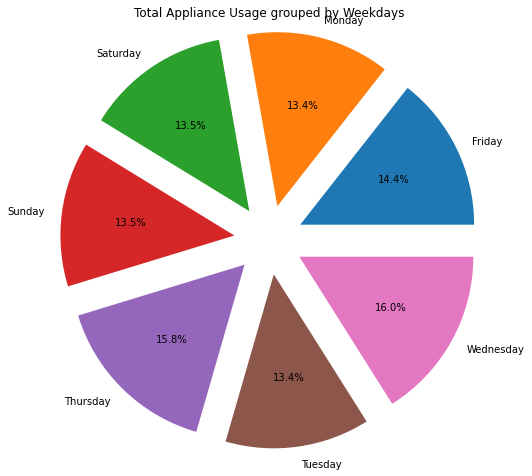

In [14]:
# grouping our data into weekdays to find usage patterns by day of week
myexplode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
(
    df1.groupby("Dayofweek").size()
    .plot(kind = 'pie', explode = myexplode,
    subplots=True, 
    figsize=(8,8), 
    autopct='%1.1f%%')
)
plt.title("Total Appliance Usage grouped by Weekdays")
plt.ylabel("")
plt.show;


The above pie chart shows an almost uniform usage across each day of the week. Although, wednesday appeared to be the day appliances were used the most. 

We shall further dig to see what appliances were used most on Wednesday

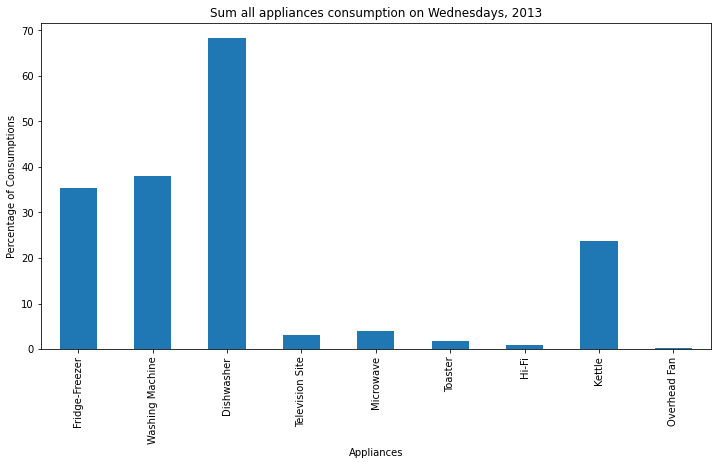

In [15]:
#checking what appliance was used on wednesday
variables = df1.iloc[:, 1:25]
wednesday = variables[variables["Dayofweek"] == "Wednesday"]
wednesday = wednesday.iloc[:, :9]
wednesday.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Sum all appliances consumption on Wednesdays, 2013');

The above chart depicts that dishwashwer was used most on wednesdays. With Washing Machine, Fridge Freezer and Kettle cutting in as the most frequently used. 


We'll further analyze monthly usage by day of week to understand the usage habit of this household

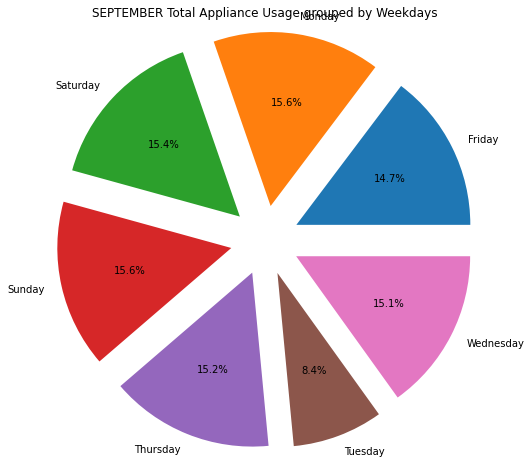

In [16]:
# SEPTEMBER General Appliance Usage by "Dayofweek"
(
    sept.groupby(["Dayofweek"]).size()
    .plot(kind = 'pie', explode = myexplode,
          subplots=True, 
          figsize=(8,8), 
          autopct='%1.1f%%')
)
plt.title("SEPTEMBER Total Appliance Usage grouped by Weekdays")
plt.ylabel("")
plt.show;


Again, we have an almost uniform usage all week. Although Saturday and Monday comes across as the days with the highest appliance usage. 

We'll analyse those two days to see if we can get any insight into the activities of that household

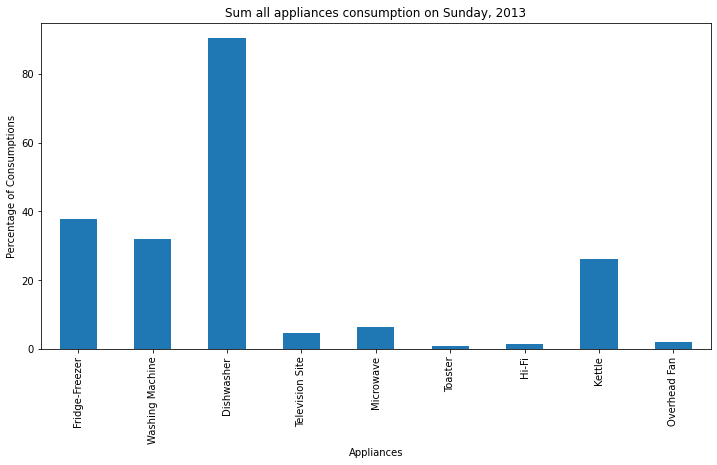

In [17]:
#checking what appliance was used most on Sundays and Mondays in September
variables = df1.iloc[:, 1:25]
variables = variables[variables["Month_name"]== "September"]
S_variables = variables[variables["Dayofweek"] == "Sunday"]
M_variables = variables[variables["Dayofweek"] == "Monday"]

S_variables= S_variables.iloc[:, 0:9]
M_variables = M_variables.iloc[:, 0:9]

S_variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Sum all appliances consumption on Sunday, 2013');



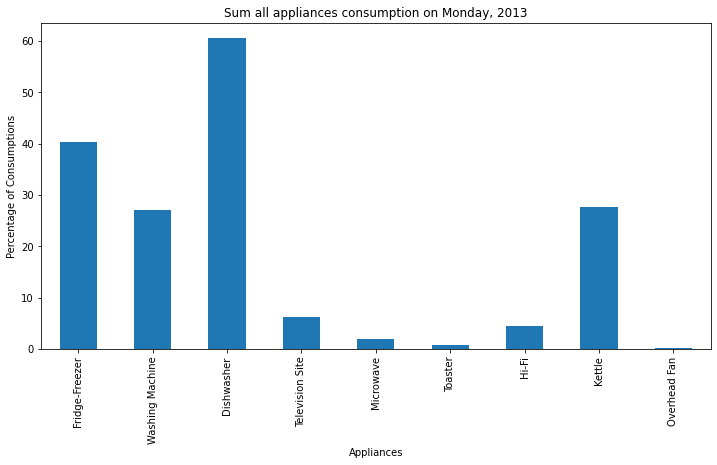

In [18]:

M_variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Sum all appliances consumption on Monday, 2013');

In the month of September, Saturdays and Mondays appears to be the day appliances were used most. And it appears that Dishwashers were used most, afterwhich  Fridge Freezer, Washing Machine and Kettle were the next most-used appliances. 

NEXT: We'll explore OCTOBERS usage classified into weekdays

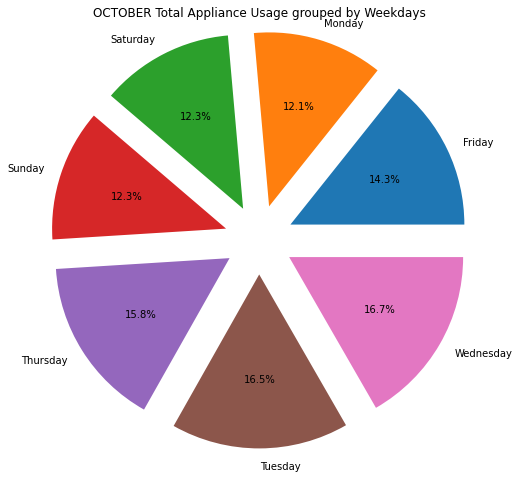

In [19]:
# OCTOBER Appliance Usage by "Dayofweek"
variables = df1.iloc[:, 1:25]
variables = variables[variables["Month_name"]== "October"]
# S_variables = variables[variables["Dayofweek"] == "Sunday"]
# M_variables = variables[variables["Dayofweek"] == "Monday"]


(
    variables.groupby(["Dayofweek"]).size()
    .plot(kind = 'pie', explode = myexplode,
          subplots=True, 
          figsize=(8,8), 
          autopct='%1.1f%%')
)
plt.title("OCTOBER Total Appliance Usage grouped by Weekdays")
plt.ylabel("")
plt.show;

October also shows an almost uniform usage across each weekday. Here, Wednesday and Tuesday come off as the days with the highest usage. We shall see what appliances were used most on those days 

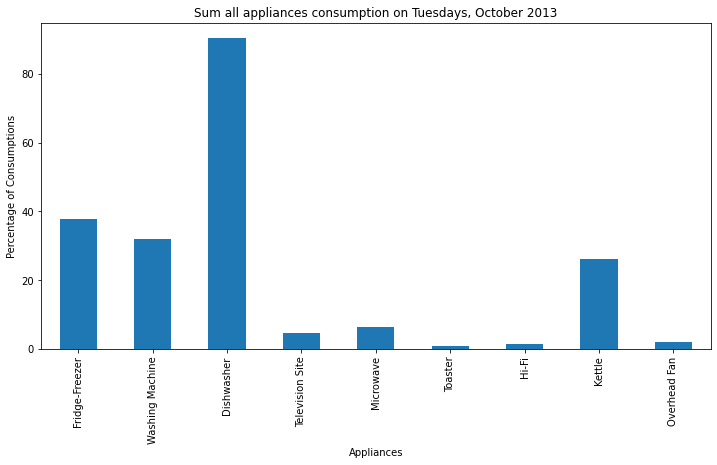

In [20]:
#checking what appliance was used most on Sundays and Mondays in September
variables = df1.iloc[:, 2:25]
variables = variables[variables["Month_name"]== "October"]
T_variables = variables[variables["Dayofweek"] == "Tuesday"]
W_variables = variables[variables["Dayofweek"] == "Wednesday"]

T_variables= S_variables.iloc[:, 0:9]
W_variables = M_variables.iloc[:, 0:9]

T_variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Sum all appliances consumption on Tuesdays, October 2013');


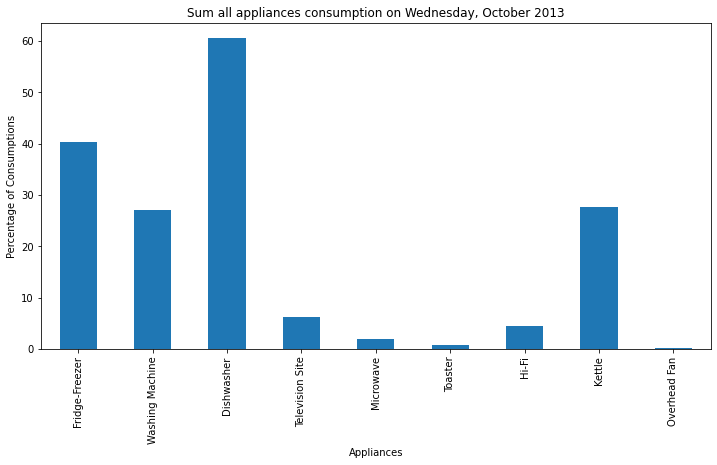

In [21]:
W_variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Sum all appliances consumption on Wednesday, October 2013');

In all these analyses, Dishwasher appears to be the most used appliances in October, with Fridge Freezer, Washing Machine and Kettle coming next as most-frequently-used appliances. 

Next, Lets Analyse December usage

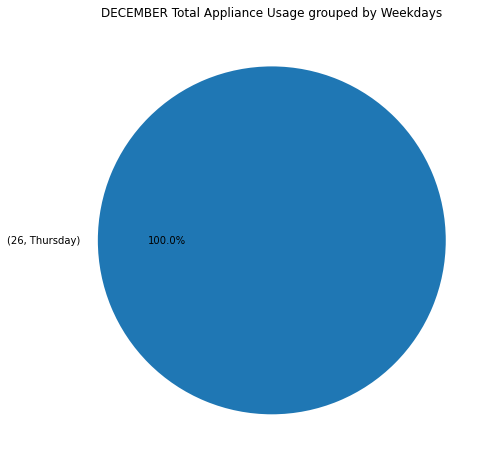

In [22]:
# DECEMBER Appliance Usage by "Dayofweek"
(
    dec.groupby(["Day", "Dayofweek"]).size()
    .plot(kind = 'pie', 
          subplots=True, 
          figsize=(8,8), 
          autopct='%1.1f%%')
)
plt.title("DECEMBER Total Appliance Usage grouped by Weekdays")
plt.ylabel("")
plt.show;

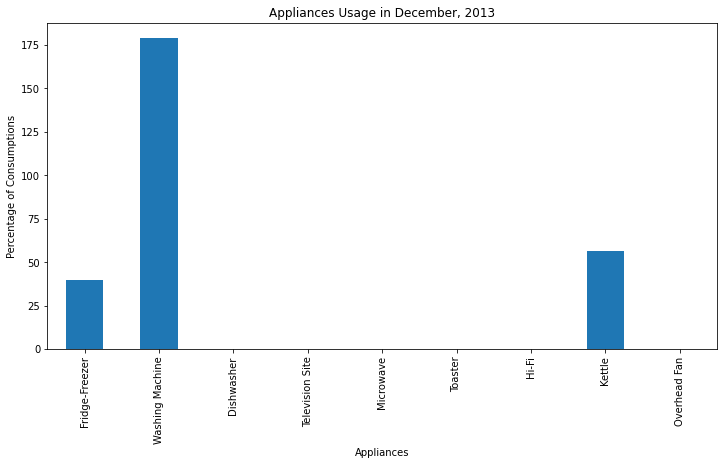

In [23]:
#checking what appliance was used most on Sundays and Mondays in September
variables = df1.iloc[:, 1:25]
variables = variables[variables["Month_name"]== "December"]
variables = variables.iloc[:, 0:9]
variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Appliances Usage in December, 2013');

December only has one day of usage (26th, Thursday). This might imply that the household had gone on vacation. 

Washing Machine, Kettle and FridgeFreezer appear as the most used appliances on this day. 

# HOURLY USAGE

In [24]:
# DEFINING THE FUNCTION FOR HOURLY CONSUMPTIONS IN SEPTEMBER
def sept_hour(D):
    df = sept[sept[D] != 0]
    df = df[[D,"Day","Hour"]]
    return df

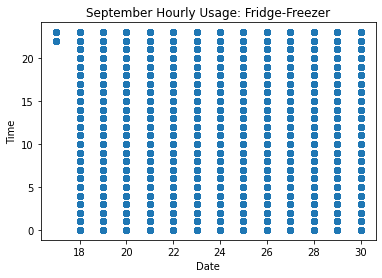

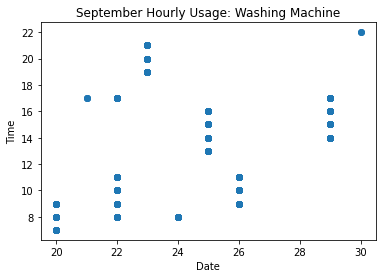

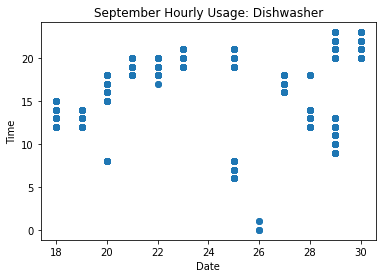

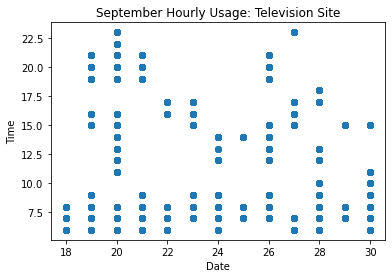

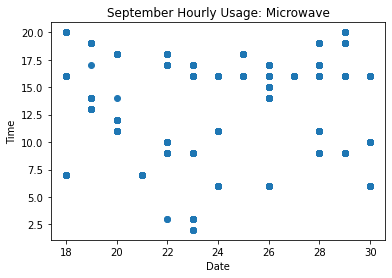

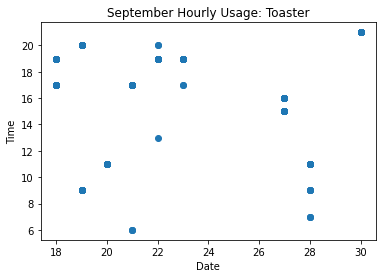

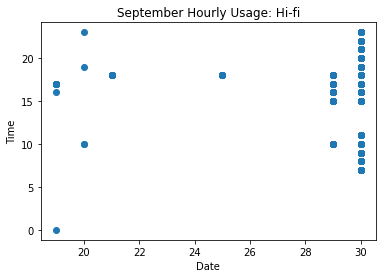

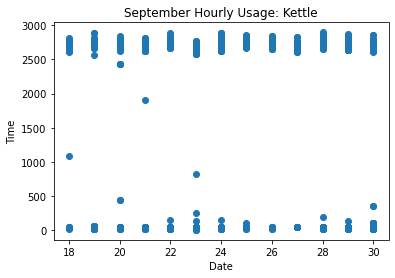

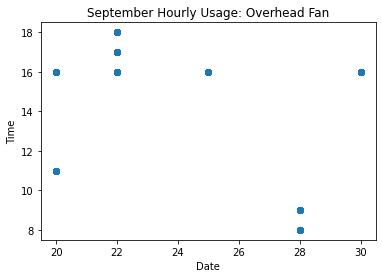

In [25]:
# SEPTEMBER HOURLY CONSUMPTION CHARTS
plt.scatter(sept_hour("Fridge-Freezer")["Day"], sept_hour("Fridge-Freezer")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Fridge-Freezer")
plt.show()


plt.scatter(sept_hour("Washing Machine")["Day"], sept_hour("Washing Machine")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Washing Machine")
plt.show()

plt.scatter(sept_hour("Dishwasher")["Day"], sept_hour("Dishwasher")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Dishwasher")
plt.show()

plt.scatter(sept_hour("Television Site")["Day"], sept_hour("Television Site")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Television Site")
plt.show()

plt.scatter(sept_hour("Microwave")["Day"], sept_hour("Microwave")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Microwave")
plt.show()

plt.scatter(sept_hour("Toaster")["Day"], sept_hour("Toaster")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Toaster")
plt.show()

plt.scatter(sept_hour("Hi-Fi")["Day"], sept_hour("Hi-Fi")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Hi-fi")
plt.show()

plt.scatter(sept_hour("Kettle")["Day"], sept_hour("Kettle")["Kettle"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Kettle")
plt.show()


plt.scatter(sept_hour("Overhead Fan")["Day"], sept_hour("Overhead Fan")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Overhead Fan")
plt.show()

In [26]:
# DEFINING THE FUNCTION FOR OCTOBER HOURLY USAGE
def oct_hour(D):
    df = oct[oct[D] != 0]
    df = df[[D,"Day","Hour"]]
    return df


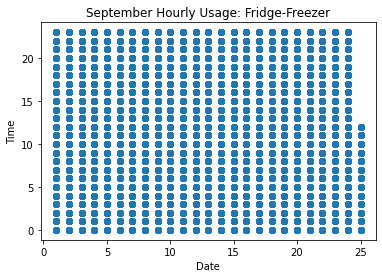

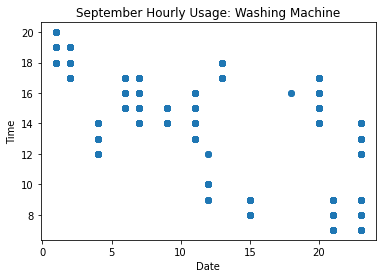

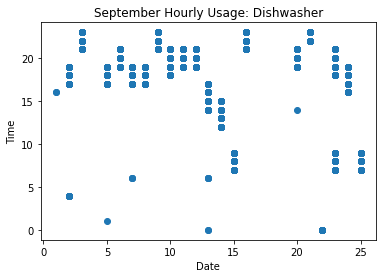

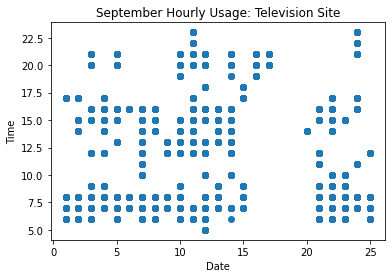

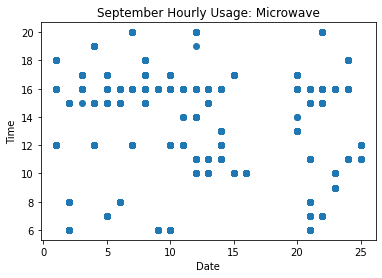

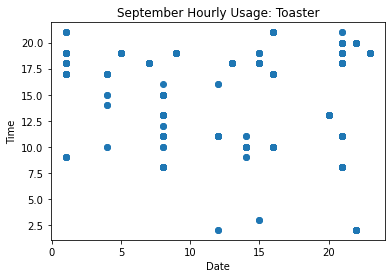

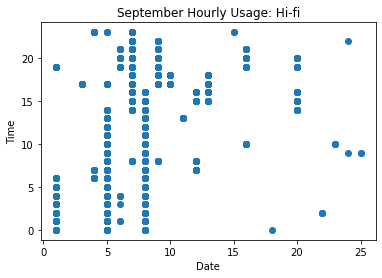

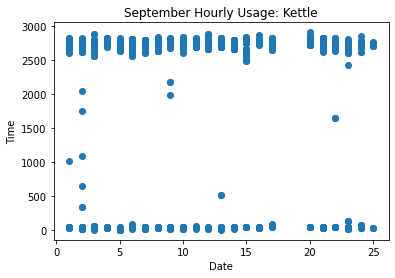

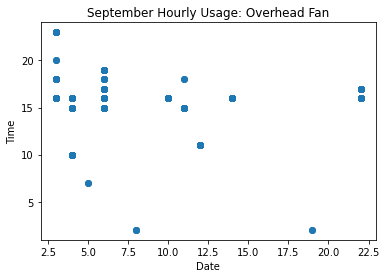

In [27]:
#OCTOBER HOURLY USAGE
plt.scatter(oct_hour("Fridge-Freezer")["Day"], oct_hour("Fridge-Freezer")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Fridge-Freezer")
plt.show()


plt.scatter(oct_hour("Washing Machine")["Day"], oct_hour("Washing Machine")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Washing Machine")
plt.show()

plt.scatter(oct_hour("Dishwasher")["Day"], oct_hour("Dishwasher")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Dishwasher")
plt.show()

plt.scatter(oct_hour("Television Site")["Day"], oct_hour("Television Site")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Television Site")
plt.show()

plt.scatter(oct_hour("Microwave")["Day"], oct_hour("Microwave")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Microwave")
plt.show()

plt.scatter(oct_hour("Toaster")["Day"], oct_hour("Toaster")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Toaster")
plt.show()

plt.scatter(oct_hour("Hi-Fi")["Day"], oct_hour("Hi-Fi")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Hi-fi")
plt.show()

plt.scatter(oct_hour("Kettle")["Day"], oct_hour("Kettle")["Kettle"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Kettle")
plt.show()


plt.scatter(oct_hour("Overhead Fan")["Day"], oct_hour("Overhead Fan")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("September Hourly Usage: Overhead Fan")
plt.show()

In [28]:
# DEFINING THE FUNCTION FOR DECEMBER CONSUMPTION
def dec_hour(D):
    df = dec[dec[D] != 0]
    df = df[[D,"Day","Hour"]]
    return df

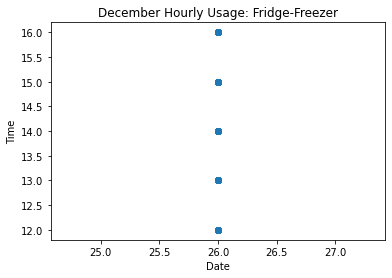

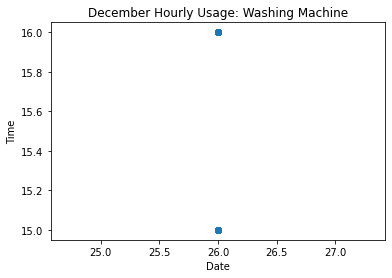

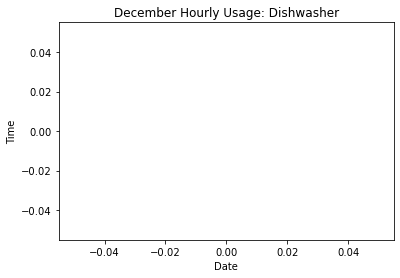

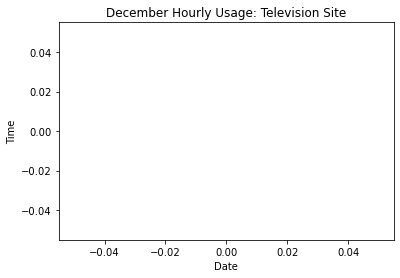

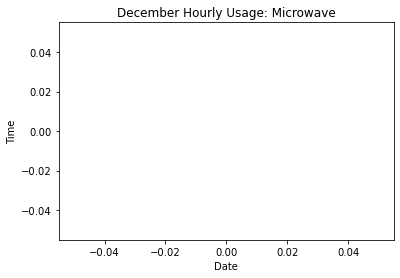

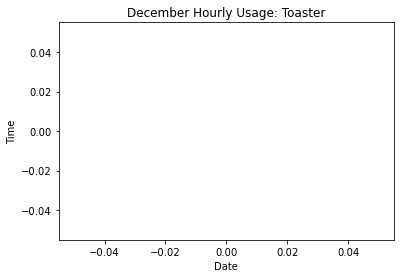

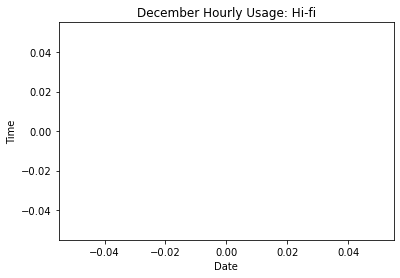

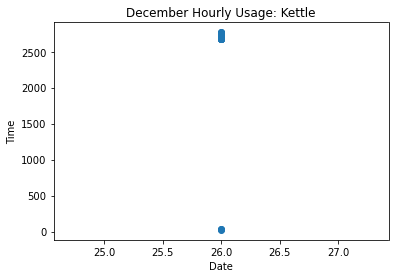

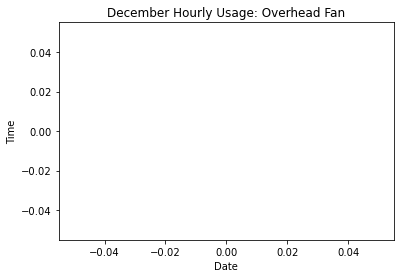

In [29]:


# DECEMBER HOURLY CONSUMPTION CHARTS
plt.scatter(dec_hour("Fridge-Freezer")["Day"], dec_hour("Fridge-Freezer")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Fridge-Freezer")
plt.show()


plt.scatter(dec_hour("Washing Machine")["Day"], dec_hour("Washing Machine")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Washing Machine")
plt.show()

plt.scatter(dec_hour("Dishwasher")["Day"], dec_hour("Dishwasher")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Dishwasher")
plt.show()

plt.scatter(dec_hour("Television Site")["Day"], dec_hour("Television Site")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Television Site")
plt.show()

plt.scatter(dec_hour("Microwave")["Day"], dec_hour("Microwave")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Microwave")
plt.show()

plt.scatter(dec_hour("Toaster")["Day"], dec_hour("Toaster")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Toaster")
plt.show()

plt.scatter(dec_hour("Hi-Fi")["Day"], dec_hour("Hi-Fi")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Hi-fi")
plt.show()

plt.scatter(dec_hour("Kettle")["Day"], dec_hour("Kettle")["Kettle"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Kettle")
plt.show()


plt.scatter(dec_hour("Overhead Fan")["Day"], dec_hour("Overhead Fan")["Hour"])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("December Hourly Usage: Overhead Fan")
plt.show()

# QUARTERLY CONSUMPTION

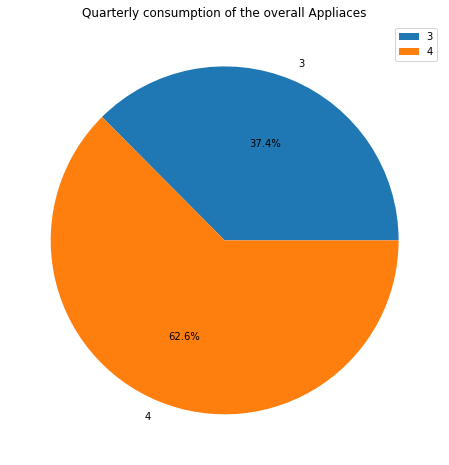

In [30]:
# Plotting the Quarterly consumption of all of all our appliances
(
    df1.groupby(["Quarter"]).size()
    .plot(kind = 'pie', 
          subplots=True, 
          figsize=(8,8), 
          autopct='%1.1f%%')
)
plt.title("Quarterly consumption of the overall Appliaces")
plt.ylabel("")
plt.legend()
plt.show;

# This chart proves to us that More Appliances were used in the 4th Quarter than in the 3rd Quarter with a ratio of 62.6% : 37.4%

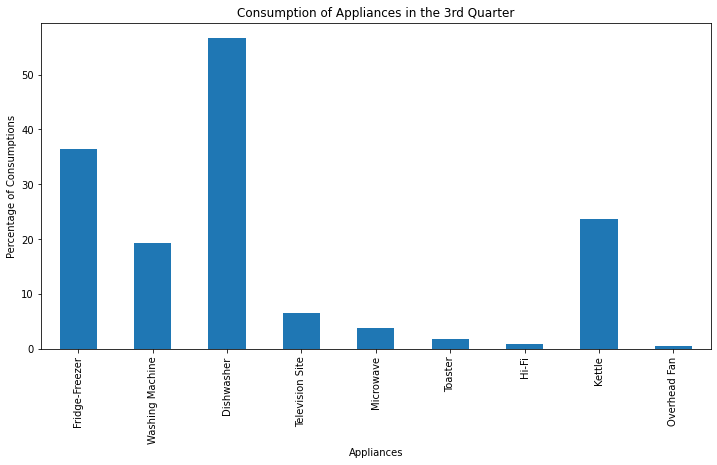

In [31]:
# Quarterly consumption of each appliances
variables = df1.iloc[:, 1:18]
variables = variables[variables["Quarter"]== 3]
variables = variables.iloc[:, 0:9]
variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances in the 3rd Quarter");

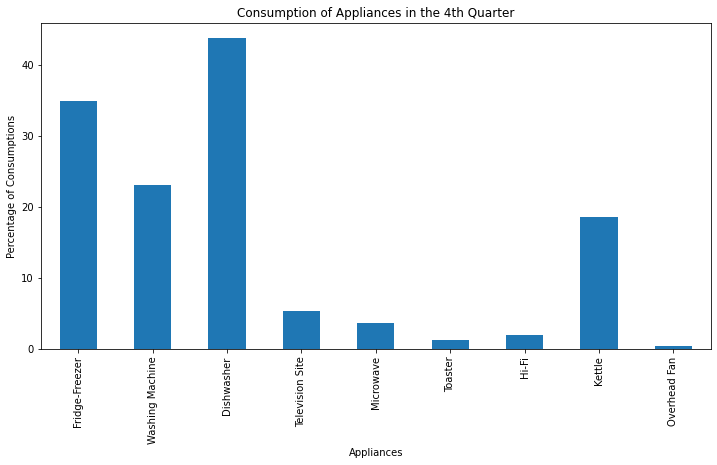

In [32]:
# Quarterly consumption of each appliances
variables = df1.iloc[:, 1:18]
variables = variables[variables["Quarter"]== 4]
variables = variables.iloc[:, 0:9]
variables.mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances in the 4th Quarter");

APPLIANCES CONSUMPTION BASED ON WEEK OF YEAR

In [33]:
# confirming the weeks our appliances were used
df1["Weekofyear"].unique()

# in all, our data covers about 7 weeks of consumption. 

array([38, 39, 40, 41, 42, 43, 52], dtype=int64)

BELOW IS A WEEK BY WEEK CONSUMPTION BREAKDOWN PER APPLIANCE

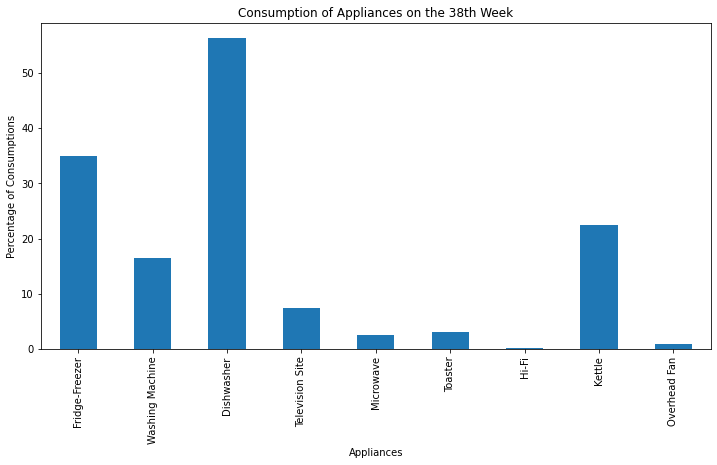

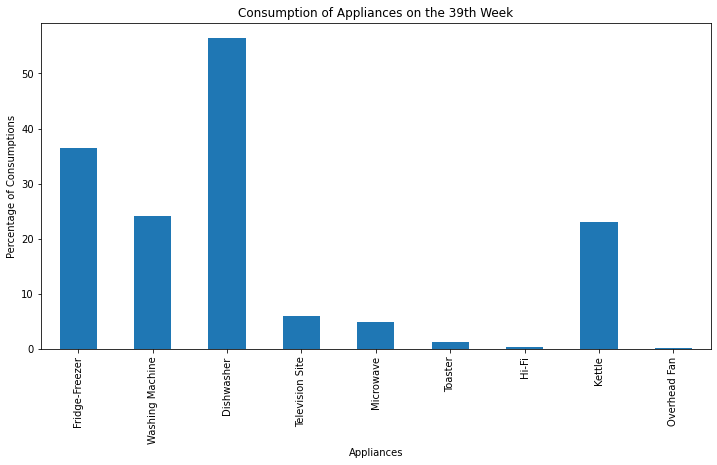

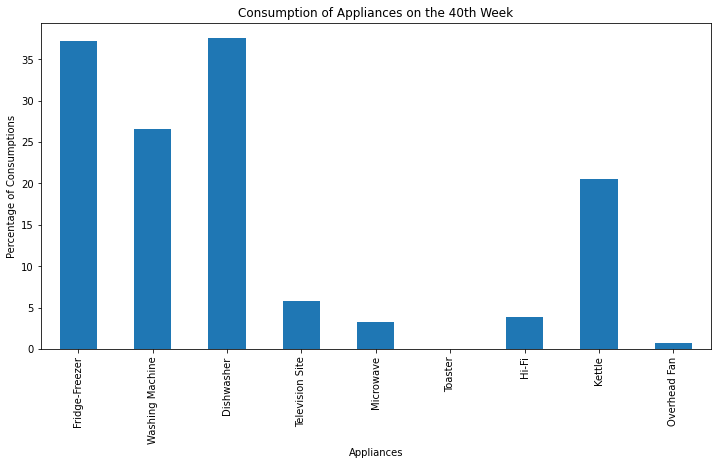

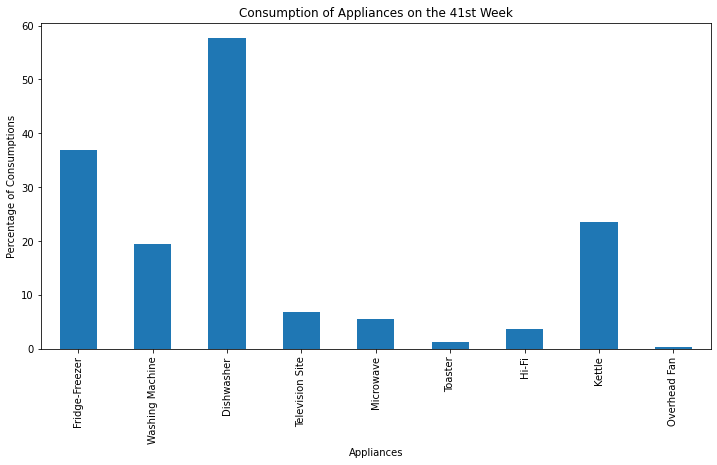

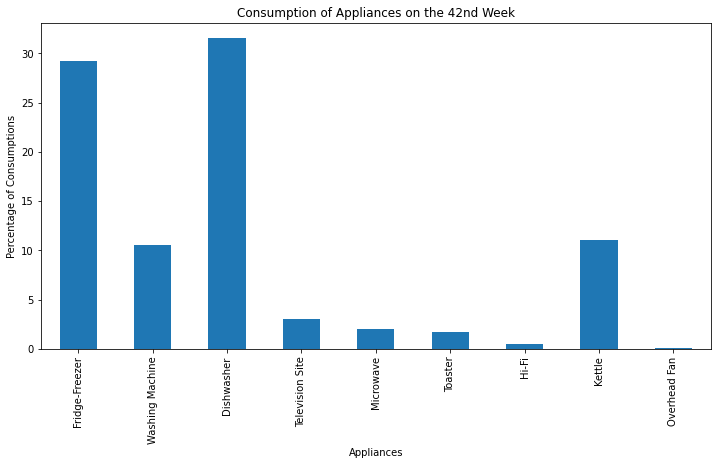

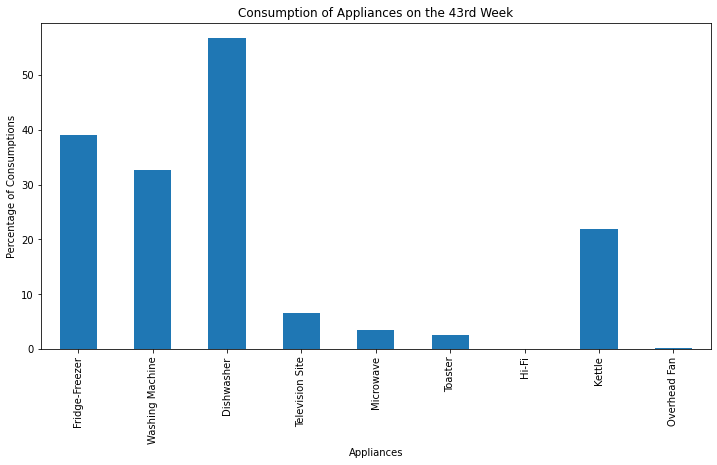

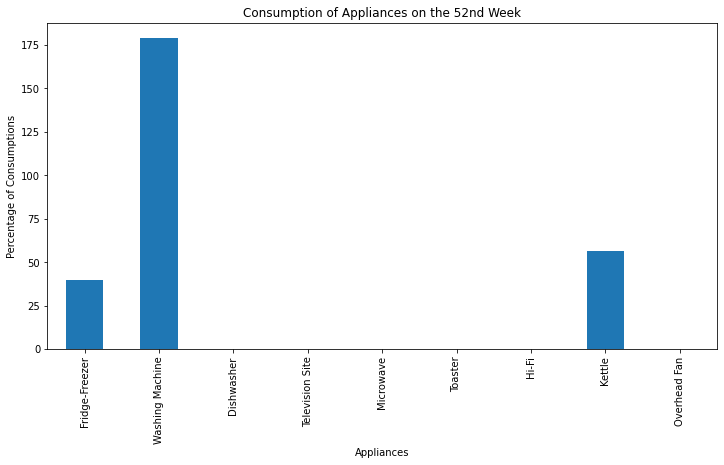

In [34]:
# WEEK 38
variables = df1[df1["Weekofyear"]==38]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 38th Week");
plt.show()

# WEEK 39
variables = df1[df1["Weekofyear"]==39]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 39th Week");
plt.show()

# WEEK 40
variables = df1[df1["Weekofyear"]==40]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 40th Week");
plt.show()

# WEEK 41
variables = df1[df1["Weekofyear"]==41]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 41st Week");
plt.show()

# WEEK 42
variables = df1[df1["Weekofyear"]==42]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 42nd Week");
plt.show()

# WEEK 43
variables = df1[df1["Weekofyear"]==43]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 43rd Week");
plt.show()

# WEEK 52
variables = df1[df1["Weekofyear"]==52]
variables = variables.iloc[:, 1:10]
variables = variables.mean()
variables.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title("Consumption of Appliances on the 52nd Week");
plt.show()


# SUMMARY
All the visual appliances above all show us the following information: 
1. the most used appliances are dishwashers, followed by Fridge-Freezer, Washing Machine, Kettle, Television Site, Microwave, Toaster, Hi-Fi and Overhead Fan respectively. 
2. These appliances were used more in the Month of October, compared to September and December, our data didn't capture anything for November. We can only assume that the household in question had been on a trip all through November till 26th of December or there was a breakdown in the collection of these data. 
3. Daily usage of these appliances barely gives us insight into the occupation of the occupants in this building. Reason is because there's uniformity in the usage of these appliance across all days of the week. 
4. The large usage of Dishwasher (as the most used appliance acrossboard) either implies the presence of a lot of people in the household or that this household ran a mini-restaurant. 
5. Hourly usage is mostly in the daytime, this might imply that this household is home all day. 

# CHECKING FOR OUTLIERS


In [39]:
#Function for outliers
def plotoutlier(df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha = 0.5)
    plt.title(variable + " Outlier")
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


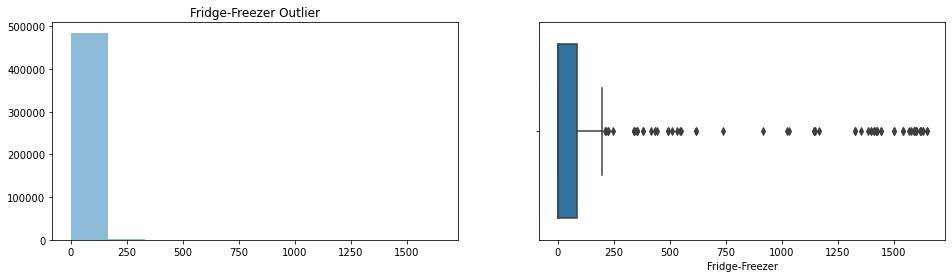

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


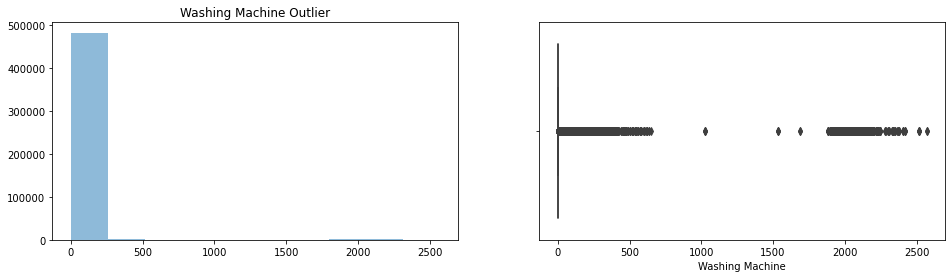

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


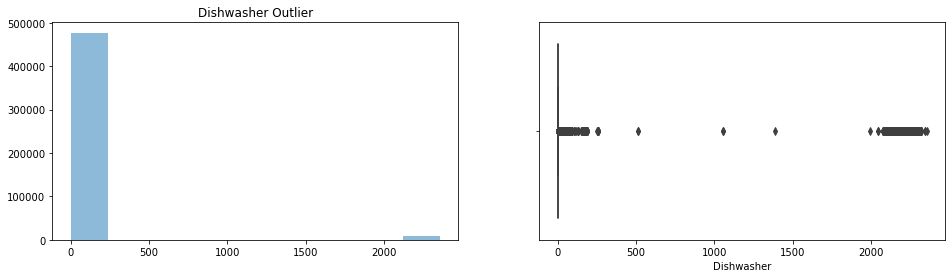

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


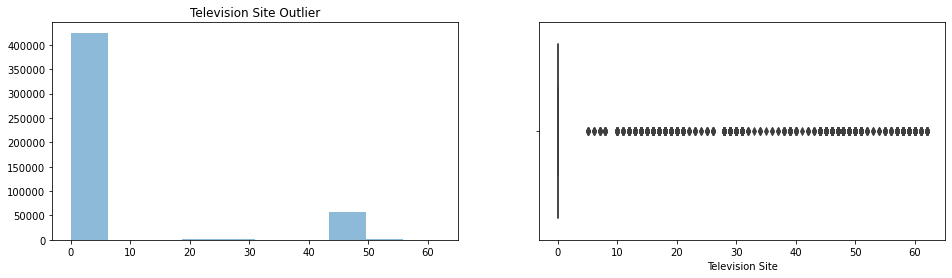

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


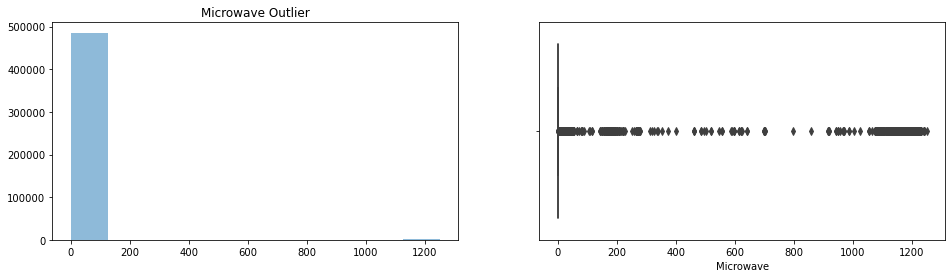

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


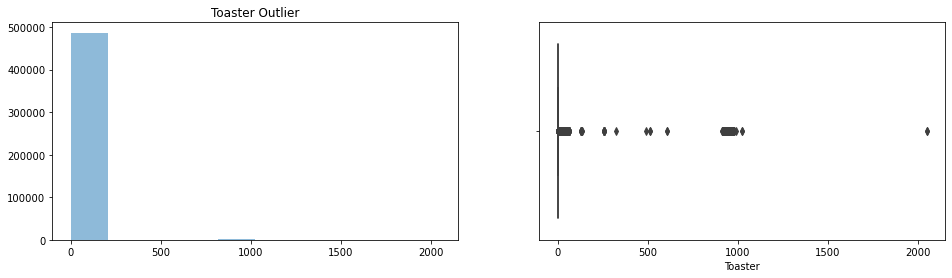

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


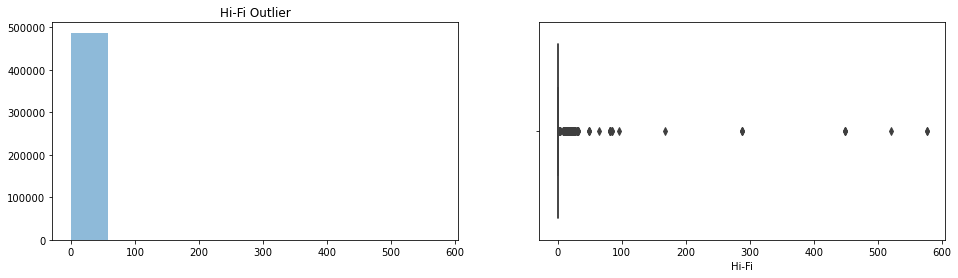

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


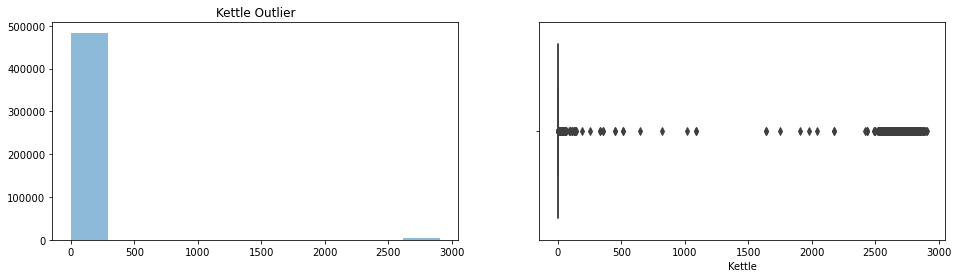

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


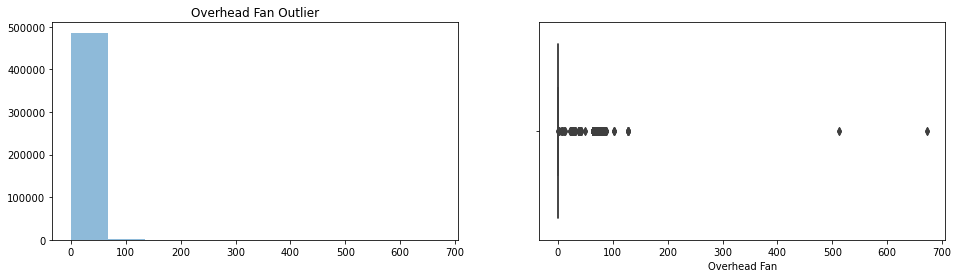

In [40]:
plotoutlier(df1, "Fridge-Freezer")
plotoutlier(df1, "Washing Machine")
plotoutlier(df1, "Dishwasher")
plotoutlier(df1, "Television Site")
plotoutlier(df1, "Microwave")
plotoutlier(df1, "Toaster")
plotoutlier(df1, "Hi-Fi")
plotoutlier(df1, "Kettle")
plotoutlier(df1, "Overhead Fan")

In [41]:
# Defining a function to find Outliers

def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [42]:
#Values below or above the upper and lower boundary by 1.5
upper_boundary, lower_boundary = find_boundaries(df1,
                                ["Fridge-Freezer", "Washing Machine", "Dishwasher", 
                                "Television Site", "Microwave", "Toaster","Hi-Fi","Kettle"
                                , "Overhead Fan"], 1.5)
upper_boundary, lower_boundary


(Fridge-Freezer     208.5
 Washing Machine      0.0
 Dishwasher           0.0
 Television Site      0.0
 Microwave            0.0
 Toaster              0.0
 Hi-Fi                0.0
 Kettle               0.0
 Overhead Fan         0.0
 dtype: float64,
 Fridge-Freezer    -123.5
 Washing Machine      0.0
 Dishwasher           0.0
 Television Site      0.0
 Microwave            0.0
 Toaster              0.0
 Hi-Fi                0.0
 Kettle               0.0
 Overhead Fan         0.0
 dtype: float64)

The above analysis shows that other than "Fridge-Freezer", other appliances do not have any figure above their 75 percentile or below their 25th percentile.

# MODEL BUILDING


In [43]:
# CREATING A NEW DATAFRAME TO BUILD OUR MODEL FOR WASHING MACHINE

In [44]:
df = df1[['Minutes','Hour',  'Day','Dayofyear','Weekofyear','month', 'Quarter',  'Washing Machine']]
#DROPPING ALL ROWS WHERE USAGE IS = O
df = df[df["Washing Machine"]!= 0]
df.head()

,Minutes,Hour,Day,Dayofyear,Weekofyear,month,Quarter,Washing Machine
33204,49,7,20,263,38,9,3,17
33205,49,7,20,263,38,9,3,17
33206,49,7,20,263,38,9,3,7
33207,49,7,20,263,38,9,3,14
33208,49,7,20,263,38,9,3,31


# SET UP TRAIN, VALIDATION AND TEST DATA


In [45]:
def create_split_features(df, target_variable):
    
    X = df[['Minutes','Hour', 'Day','Dayofyear','Weekofyear','month', 'Quarter']]
    
    if target_variable:
        y = df[target_variable]
    
    # split the full data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [46]:
X_train, X_valid, y_train, y_valid = create_split_features(df,target_variable="Washing Machine")

In [47]:
X_train.head()

,Minutes,Hour,Day,Dayofyear,Weekofyear,month,Quarter
108942,17,15,25,268,39,9,3
83879,10,21,23,266,39,9,3
462471,44,12,23,296,43,10,4
120007,38,10,26,269,39,9,3
108043,45,13,25,268,39,9,3


In [48]:
X_valid.head()

,Minutes,Hour,Day,Dayofyear,Weekofyear,month,Quarter
364992,13,9,15,288,42,10,4
109179,41,15,25,268,39,9,3
63459,51,10,22,265,38,9,3
109117,35,15,25,268,39,9,3
107863,27,13,25,268,39,9,3


In [49]:
y_train.head()

108942      92
83879      290
462471      58
120007     240
108043    2076
Name: Washing Machine, dtype: int64

In [50]:
y_valid.head()

364992    274
109179     11
63459     240
109117     54
107863     30
Name: Washing Machine, dtype: int64

In [51]:
# Split data again in ratio 70:20:10
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101) 

In [52]:
print("TRAIN SET:", len(y_train), "VALIDATION SET:", len(y_valid), "TEST SET:", len(y_test))

TRAIN SET: 16452 VALIDATION SET: 4701 TEST SET: 2351


In [53]:
y_train

207374    2066
294368    2115
108640      83
163041    2073
230452     144
          ... 
163231       6
318961       5
207847     145
108057    2039
34055       21
Name: Washing Machine, Length: 16452, dtype: int64

# VISUALIZING RELATIONSHIPS

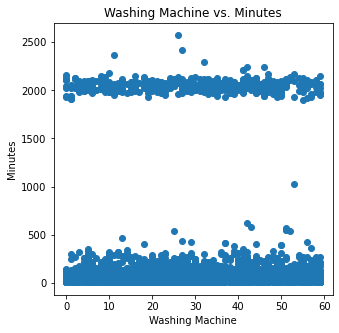

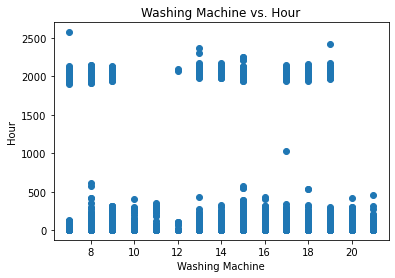

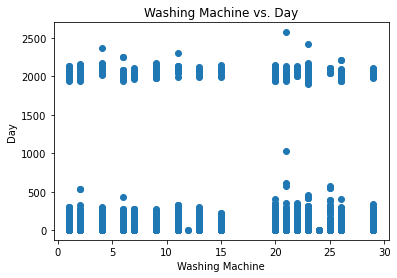

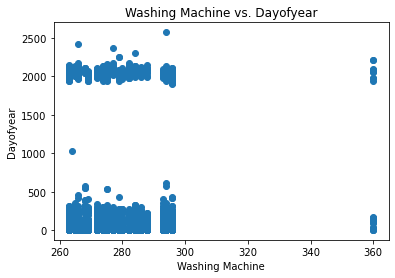

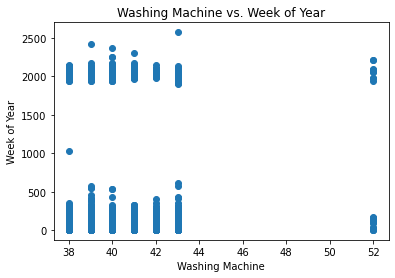

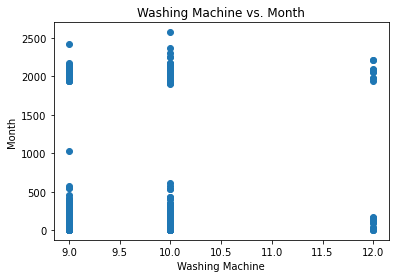

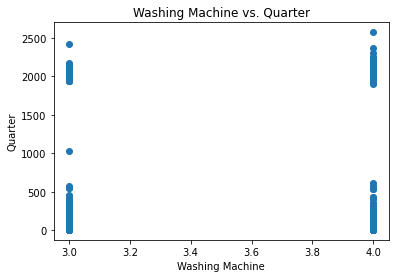

In [54]:
# Visualizing Marketing Spend and Revenue
plt.figure(figsize=(5, 5))

# Minutes
plt.scatter(X_test['Minutes'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Minutes')
plt.title("Washing Machine vs. Minutes")
plt.show();

#Hour
plt.scatter(X_test['Hour'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Hour')
plt.title("Washing Machine vs. Hour")
plt.show();

#Day
plt.scatter(X_test['Day'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Day')
plt.title("Washing Machine vs. Day")
plt.show();

#Day of year
plt.scatter(X_test['Dayofyear'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Dayofyear')
plt.title("Washing Machine vs. Dayofyear")
plt.show();

#Week of Year
plt.scatter(X_test['Weekofyear'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Week of Year')
plt.title("Washing Machine vs. Week of Year")
plt.show();

# "Washing Machine vs. Month"
plt.scatter(X_test['month'],y_test)
plt.xlabel('Washing Machine')
plt.ylabel('Month')
plt.title("Washing Machine vs. Month")
plt.show();

#"Quarter"
plt.scatter(X_test["Quarter"],y_test)
plt.xlabel('Washing Machine')
plt.ylabel("Quarter")
plt.title("Washing Machine vs. Quarter")
plt.show();

In [55]:
X_train.head()

,Minutes,Hour,Day,Dayofyear,Weekofyear,month,Quarter
207374,55,17,2,275,40,10,4
294368,0,15,9,282,41,10,4
108640,46,14,25,268,39,9,3
163041,11,15,29,272,39,9,3
230452,39,13,4,277,40,10,4


SCALING OUR DATA WITH ROBUST SCALER

In [56]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [57]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [58]:
#Convert the NumPy arrays into dataframes just to use for correlation analysis:
variables = ['Minutes','Hour', 'Day', 'Dayofyear','Weekofyear','month', 'Quarter']
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = variables)

In [59]:
X_test_scaled_df.head()

,Minutes,Hour,Day,Dayofyear,Weekofyear,month,Quarter
0,0.482759,-1.000000,0.0000,-0.777778,-1.0,-1.0,-1.0
1,0.586207,-0.285714,0.1875,1.055556,1.5,0.0,0.0
2,0.413793,0.000000,0.0000,0.888889,1.0,0.0,0.0
3,-0.275862,-0.857143,0.1875,1.055556,1.5,0.0,0.0
4,-0.068966,-0.285714,0.1875,1.055556,1.5,0.0,0.0


FEATURES CORRELATION

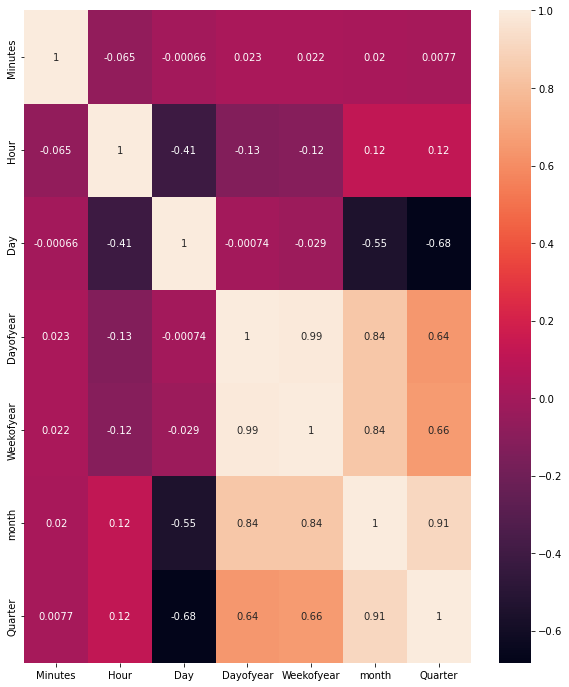

In [60]:
# Create a correlation matrix for the dataframe
corr = X_train_scaled_df.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(corr, annot = True);

("Day of Year" and "Week of Year";
"Day of Year" and ["month", "Quarter"]; and
"month" and "Quarter";)
exhibit a very strong multi-colinearity. "Day of Year" and "Month" will be dropped.

In [61]:
# # Dropping "Dayofyear" and "month" from our scaled df
X_train_scaled_df.drop(["Weekofyear", "Quarter"], axis=1, inplace=True)
X_valid_scaled_df.drop(["Weekofyear", "Quarter"], axis=1, inplace=True)
X_test_scaled_df.drop(["Weekofyear", "Quarter"], axis=1, inplace=True)


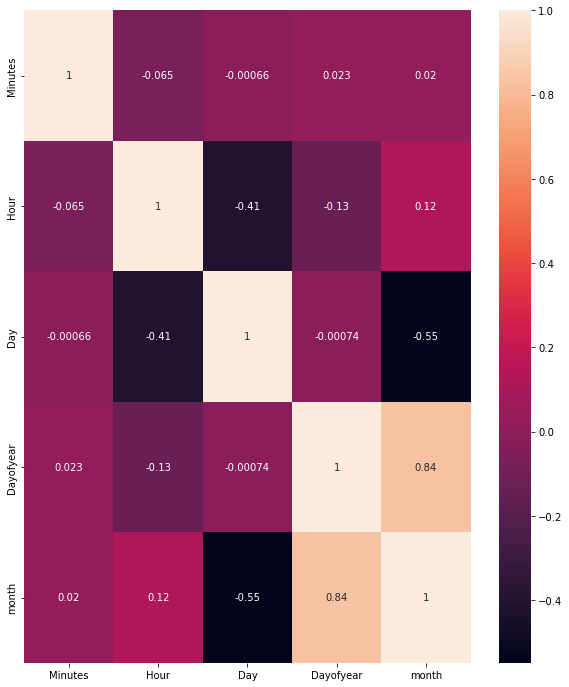

In [62]:
# # Create a correlation matrix for the dataframe
corr = X_train_scaled_df.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(corr, annot = True);

PERFORMING FEATURE IMPORTANCE WITH LINEAR REGRESSION

month       -14148.134787
Day          -7650.771587
Hour          -175.511750
Minutes         29.725052
Dayofyear     8475.649397
dtype: float64


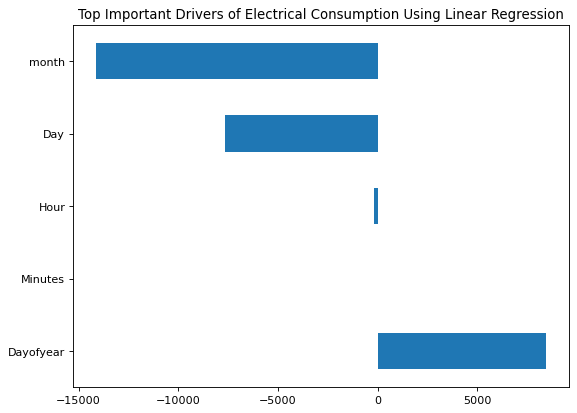

In [63]:
# define the model
model = LinearRegression()
# fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled_df, y_valid)
# get importance
importance = model.coef_
# summarize feature importance
predictors = X_valid_scaled_df.columns
coef = pd.Series(model.coef_, index = predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electrical Consumption Using Linear Regression")

feat_importances = pd.Series(model.coef_, index= X_valid_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh');

DECISION TREE REGRESSOR FOR FEATURE IMPORTANCE

month        0.000064
Day          0.118269
Dayofyear    0.136913
Hour         0.306068
Minutes      0.438686
dtype: float64


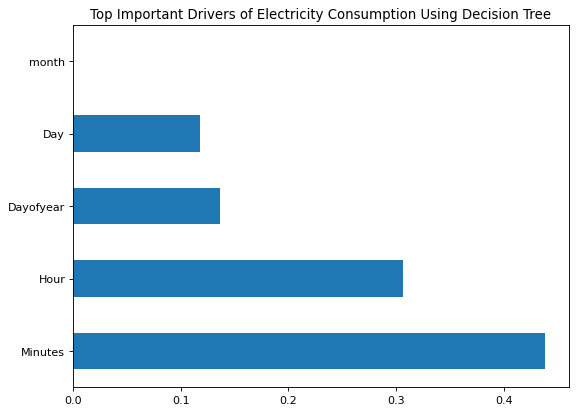

In [64]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled_df, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electricity Consumption Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh');

RANDOM FOREST REGRESSOR FOR FEATURE IMPORTANCE

month        0.013111
Dayofyear    0.136433
Day          0.141321
Hour         0.261911
Minutes      0.447225
dtype: float64


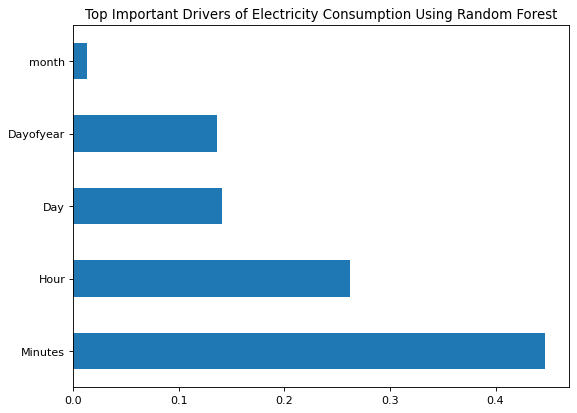

In [65]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled_df, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electricity Consumption Using Random Forest")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh');


FEATURE IMPORTANCE WITH XG BOOST

month        0.000000
Minutes      0.165886
Dayofyear    0.236233
Hour         0.282017
Day          0.315865
dtype: float32


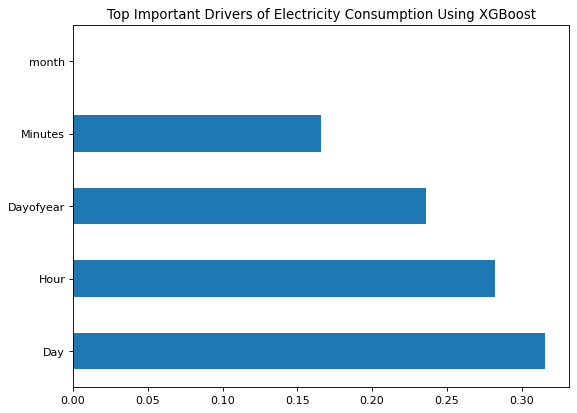

In [66]:
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train_scaled_df, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electricity Consumption Using XGBoost")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh');

From the above Feature Importance chart, we understand that the Features "Month" and "Quarter" are the least relevant to our prediction, However, XGBoost Feature importance chart shows that the "Month" Feature might prove really relevant to our prediction, Hence only "Quarter" Feature will be dropped. 


NB: DROPPING THE "QUARTER" feature affected the performance of our model. So I'll just leave the feature

In [67]:
# Dropping Month and Quarter Features
# X_train_scaled_df.drop(["Quarter"], axis=1, inplace=True)
# X_valid_scaled_df.drop(["Quarter"], axis=1, inplace=True)
# X_test_scaled_df.drop(["Quarter"], axis=1, inplace=True)

In [68]:
X_test_scaled_df.head()

,Minutes,Hour,Day,Dayofyear,month
0,0.482759,-1.000000,0.0000,-0.777778,-1.0
1,0.586207,-0.285714,0.1875,1.055556,0.0
2,0.413793,0.000000,0.0000,0.888889,0.0
3,-0.275862,-0.857143,0.1875,1.055556,0.0
4,-0.068966,-0.285714,0.1875,1.055556,0.0


In [69]:
#Re-Scale the adjusted data above
scaler = RobustScaler()
scaler.fit(X_train_scaled_df)

RobustScaler()

In [70]:
X_train_scaled = scaler.transform(X_train_scaled_df)
X_valid_scaled = scaler.transform(X_valid_scaled_df)
X_test_scaled = scaler.transform(X_test_scaled_df)

In [71]:
X_train_scaled.shape

(16452, 5)

In [72]:
X_valid_scaled.shape

(4701, 5)

# MODEL BUILDING

LINEAR REGRESSOR

In [73]:
# 1. Importing, creating and training Linear Reggressor Estimator
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_df, y_train)

LinearRegression()

In [74]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test))

test_mse1 = mean_squared_error(y_pred1, y_test)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -62.196969579268256
Test RMSE: 763.15


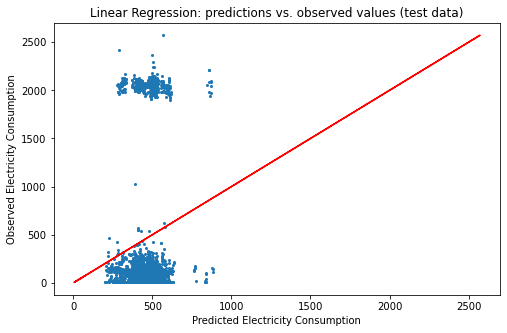

In [75]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

K-NEAREST NEIGHBOUR

In [76]:
#Evaluate the Performance of our Predictive Model (K-Nearest Neighbour)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(X_train_scaled_df, y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [77]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred2 = knn.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test))

test_mse2 = mean_squared_error(y_pred2, y_test)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  0.9683377641004994
Test RMSE: 136.83


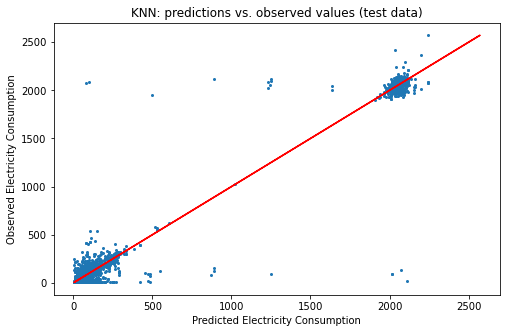

In [78]:
# Visualizing K-NN performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

# DECISION TREE MODEL

In [79]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train_scaled_df, y_train)

DecisionTreeRegressor(max_depth=3)

In [80]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test))

test_mse3 = mean_squared_error(y_pred3, y_test)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -13.593579018337614
Test RMSE: 737.27


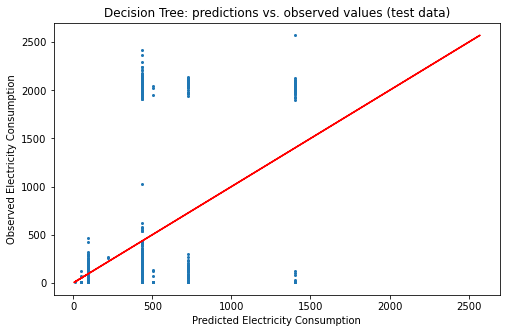

In [81]:
# Visualizing Decision Tree Regressor performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(dtree.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Decision Tree: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

# RANDOM FOREST MODEL

In [82]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled_df, y_train)

RandomForestRegressor(max_depth=3)

In [83]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test))

test_mse4 = mean_squared_error(y_pred4, y_test)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -14.160170770043864
Test RMSE: 735.99


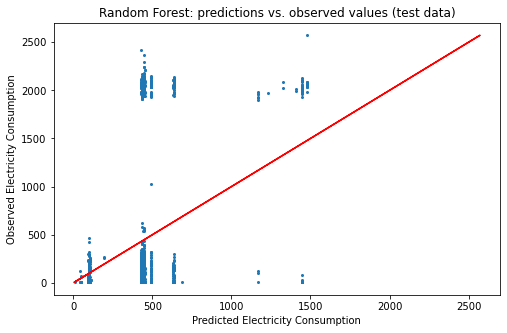

In [84]:
# Visualizing K-NN performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(rf.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Random Forest: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

# XGBOOST MODEL 

In [85]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled_df, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [86]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred5 = xgb_model.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred5, y_test))

test_mse5 = mean_squared_error(y_pred5, y_test)

test_rmse5 = np.sqrt(test_mse5)

print('Test RMSE: %.2f' % test_rmse5)

Test r2 score:  0.9669572224084919
Test RMSE: 137.81


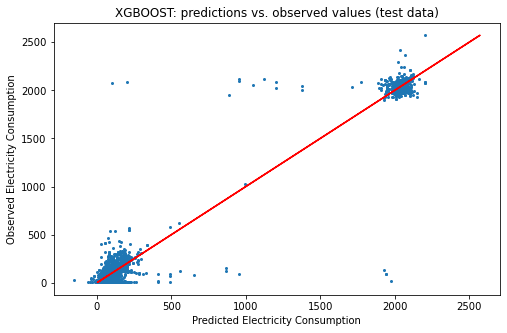

In [87]:
# Visualizing K-NN performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(xgb_model.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('XGBOOST: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

# TRAINING MULTIPLE MODEL

In [88]:
# Get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['svm'] = SVR()
    models['xgb'] = XGBRegressor() 
    return models

In [89]:
# Fit Models on training data
def fit_model(model, X, y):
    model.fit(X, y)
    return model

In [90]:
# evaluate models using validation data
def evaluate_model_valid(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [91]:
# evaluate models using test data
def evaluate_model_test(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [92]:
# evaluate models using cross-validation
def evaluate_model_cv(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [93]:
#See Different Evaluation Metrics in Scikit-Learn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Training, Evaluation and Testing Operations

In [94]:
# get the models to fit
models = get_models()

# evaluate the models and store results
names_fit,results_fit = list(),list()
for name,model in models.items():
    fit_model(model, X_train_scaled, y_train) 
    names_fit.append(name)
    results_fit.append(model)
fitted_models = dict(zip(names_fit, results_fit))
print(fitted_models)    

{'lr': LinearRegression(), 'knn': KNeighborsRegressor(), 'cart': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'svm': SVR(), 'xgb': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)}


In [95]:
# Evaluate on validation data
models = fitted_models
# evaluate the models and store results
results_ev, names_ev = list(), list()
for name, model in models.items():
    scores = evaluate_model_valid(model, X_valid_scaled, y_valid)
    results_ev.append(scores)
    names_ev.append(name)
    print('%s: %.2f' % (name,scores))

lr: -62.44
knn: 0.97
cart: 0.96
rf: 0.97
svm: -2163.82
xgb: 0.96


In [96]:
# Evaluate on Test data
results_test, names_test = list(), list()
for name, model in models.items():
    scores = evaluate_model_test(model, X_test_scaled,y_test)
    results_test.append(scores)
    names_test.append(name)
    print('%s: %.2f' % (name,scores))

lr: -62.20
knn: 0.97
cart: 0.97
rf: 0.97
svm: -2276.20
xgb: 0.97


In [97]:
# Run Cross-Validation 
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_cv(model, X_train_scaled,y_train)
    results.append(scores)
    names.append(name)
    print('%s %.3f' % (name, mean(scores)))

lr 0.014
knn 0.971
cart 0.975
rf 0.975
svm -0.191
xgb 0.973


# STACKING API

In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('rf', RandomForestRegressor()))
    
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def stack_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['rf'] = RandomForestRegressor()
    models['stacking'] = get_stacking()
    return models
 
# evaluate a give model using cross-validation
def stack_evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = stack_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = stack_evaluate_model(model, X_train_scaled,y_train)
    results.append(scores)
    names.append(name)
    print('%s %.3f' % (name, mean(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

lr 0.014
knn 0.971
cart 0.975
svm -0.191
rf 0.975


In [ ]:
# save the model to disk
model =KNeighborsRegressor()
filename = 'electricity_consumption_model.sav'
pickle.dump(model, open(filename, 'wb'))
 



In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model